<a href="https://colab.research.google.com/github/Abu-shanto/Machine-Learning-/blob/main/Brain_Tumour%2C_Only_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/brain_tumor_dataset train'
valid_path = '/content/drive/MyDrive/brain tumor dataset test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/brain_tumor_dataset train')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor_dataset train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 253 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/brain tumor dataset test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 253 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your training and validation data directories
train_data_dir = '/content/drive/MyDrive/brain_tumor_dataset train'
validation_data_dir = '/content/drive/MyDrive/brain tumor dataset test'

# Define the image dimensions and batch size
image_width, image_height = 224, 224
batch_size = 32

# Create a data generator for training data with augmentation
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create a data generator for validation data (no augmentation)
validation_data_generator = ImageDataGenerator(rescale=1./255)

# Load the training data
train_set = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load the validation data
validation_set = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
r = model.fit(
    train_set,
    validation_data=validation_set,
    epochs=10
)



Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
Epoch 1/10
8/8 [==============================] - 153s 21s/step - loss: 1.3963 - accuracy: 0.5692 - val_loss: 0.8021 - val_accuracy: 0.6324
Epoch 2/10
8/8 [==============================] - 18s 2s/step - loss: 0.9037 - accuracy: 0.5652 - val_loss: 0.7737 - val_accuracy: 0.4545
Epoch 3/10
8/8 [==============================] - 22s 3s/step - loss: 0.6473 - accuracy: 0.6047 - val_loss: 0.6120 - val_accuracy: 0.6443
Epoch 4/10
8/8 [==============================] - 17s 2s/step - loss: 0.6272 - accuracy: 0.6838 - val_loss: 0.5761 - val_accuracy: 0.6798
Epoch 5/10
8/8 [==============================] - 22s 3s/step - loss: 0.5847 - accuracy: 0.7115 - val_loss: 0.5197 - val_accuracy: 0.7273
Epoch 6/10
8/8 [==============================] - 19s 2s/step - loss: 0.5553 - accuracy: 0.7233 - val_loss: 0.4936 - val_accuracy: 0.7747
Epoch 7/10
8/8 [==============================] - 17s 2s/step - loss: 0.5321 - accuracy:

In [ ]:
import matplotlib.pyplot as plt

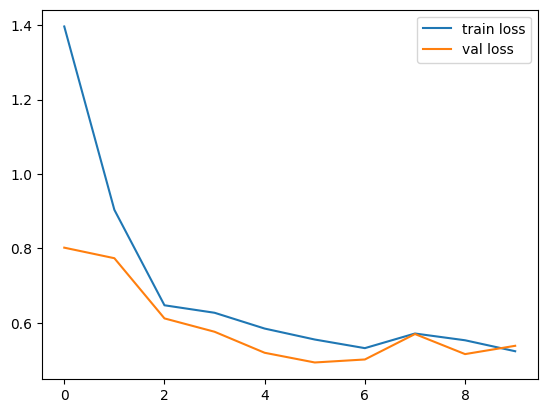

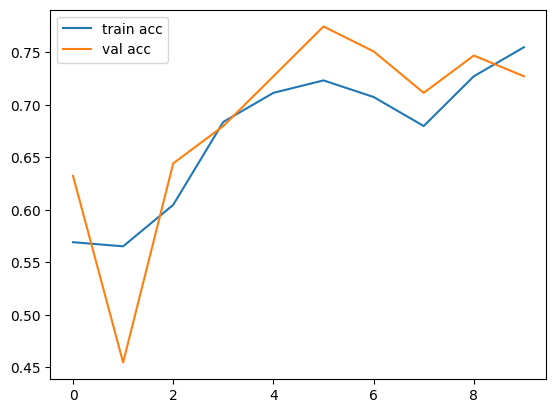

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet.h5')

In [ ]:
y_pred = model.predict(test_set)

8/8 [==============================] - 5s 492ms/step


In [ ]:
y_pred


array([[5.1162374e-01],
       [9.6721625e-01],
       [8.4328580e-01],
       [6.2550807e-01],
       [8.3616519e-01],
       [6.0645807e-01],
       [6.2792146e-01],
       [9.5799339e-01],
       [9.2980111e-01],
       [9.2359608e-01],
       [8.8927931e-01],
       [8.3676112e-01],
       [9.8402965e-01],
       [9.9980426e-01],
       [4.0921170e-01],
       [9.2786503e-01],
       [9.8379320e-01],
       [2.9757893e-01],
       [5.4310299e-02],
       [5.7345700e-01],
       [8.4445643e-01],
       [4.1459960e-01],
       [6.3647610e-01],
       [8.0754596e-01],
       [6.8400651e-01],
       [7.0912939e-01],
       [9.5684838e-01],
       [9.1738248e-01],
       [9.2862922e-01],
       [9.8531729e-01],
       [5.0263727e-01],
       [8.2404345e-01],
       [7.9072392e-01],
       [7.4955547e-01],
       [9.1979766e-01],
       [9.9557054e-01],
       [9.0592289e-01],
       [9.5381653e-01],
       [4.1459960e-01],
       [8.3676112e-01],
       [2.7943307e-01],
       [9.737665

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet.h5')